In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS  # wordcloud Represent the chunk of words according to the size of frequency

In [ ]:
from google.colab import drive  # If import dataset from google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv') # file path of google drive dataset
test_df

In [ ]:
from google.colab import files # If import dataset from local machine
access_csv = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df = df[:100]
df.sample(5)

,review,sentiment
72,I thought that Mukhsin has been wonderfully wr...,positive
36,The plot is about the death of little children...,negative
8,Encouraged by the positive comments about this...,negative
15,"Kind of drawn in by the erotic scenes, only to...",negative
54,The 33 percent of the nations nitwits that sti...,negative


In [ ]:
df['sentiment'].value_counts()

sentiment
negative    58
positive    42
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

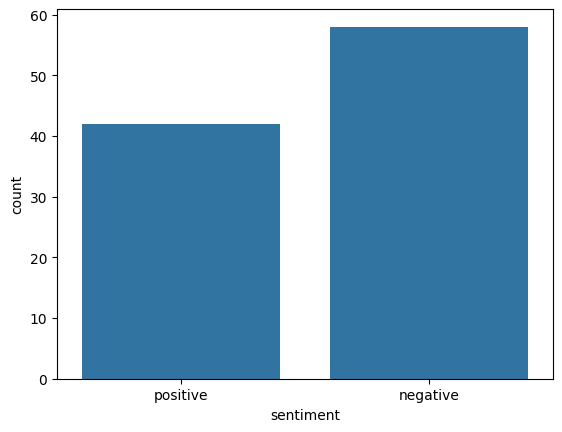

In [ ]:
sns.countplot(x='sentiment', data=df)

In [ ]:
positive_reviews = list(df[df['sentiment']=='positive']['review'])
negative_reviews = list(df[df['sentiment']=='negative']['review'])

In [ ]:
def create_cloud(string, title=None):
  cloud = WordCloud(height=2000,
                    width=3500,
                    background_color='gray',
                    min_font_size=10,
                    stopwords=STOPWORDS).generate(string)
  plt.figure(figsize=(20,30))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  if title:
    plt.title(title, fontdict={'fontsize':24})
  plt.show()

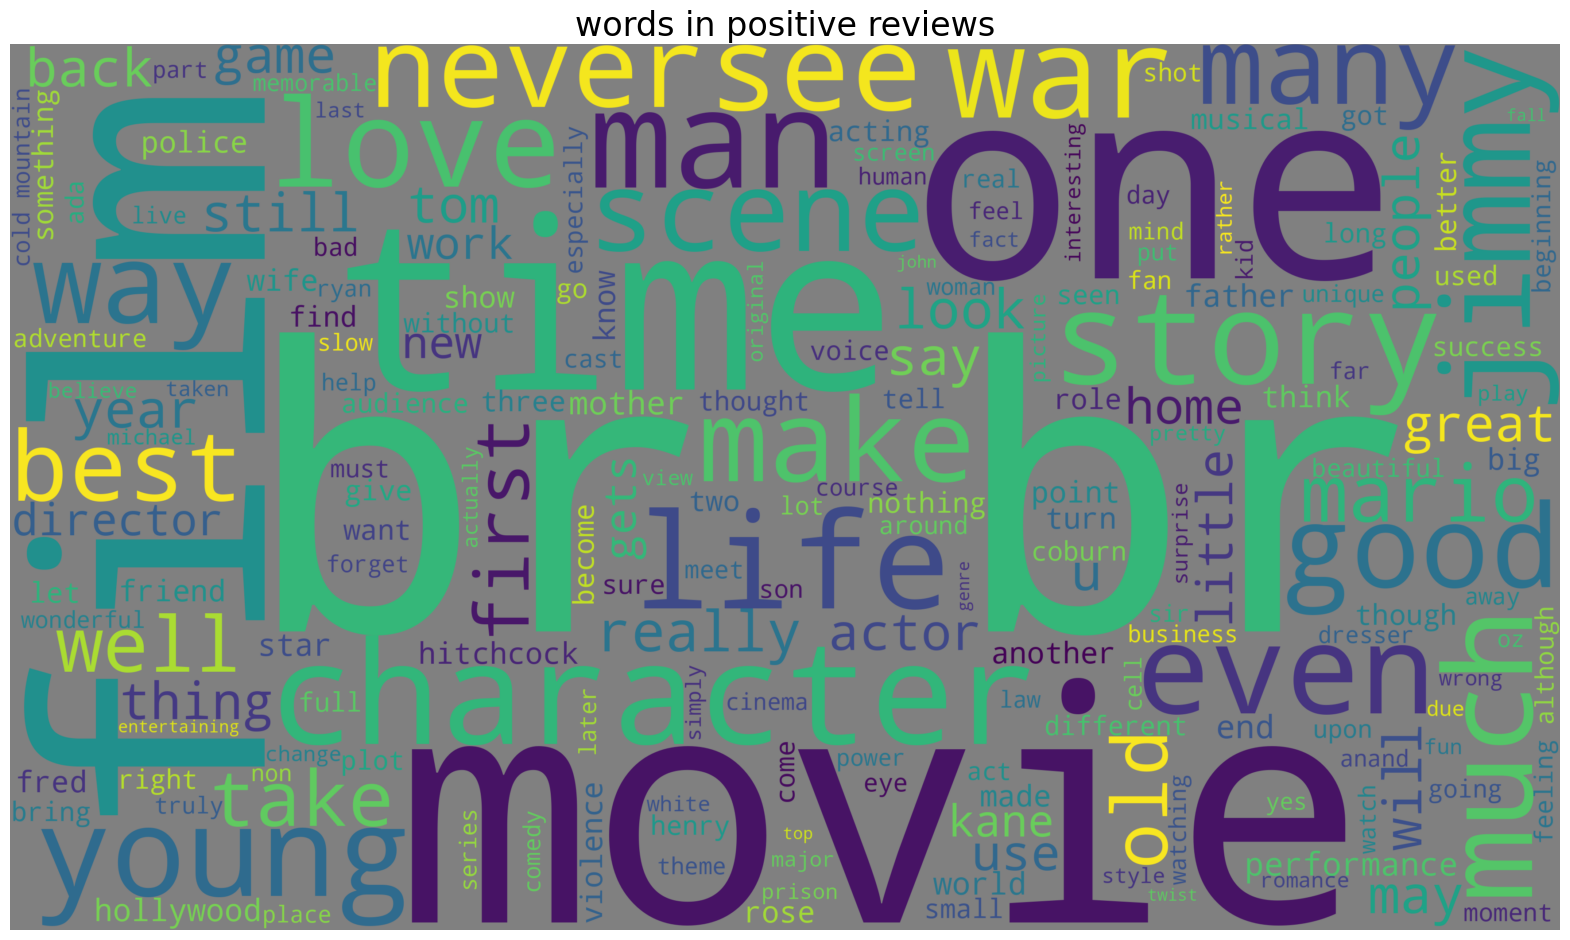

In [ ]:
create_cloud(' '.join(positive_reviews).lower(), 'words in positive reviews')

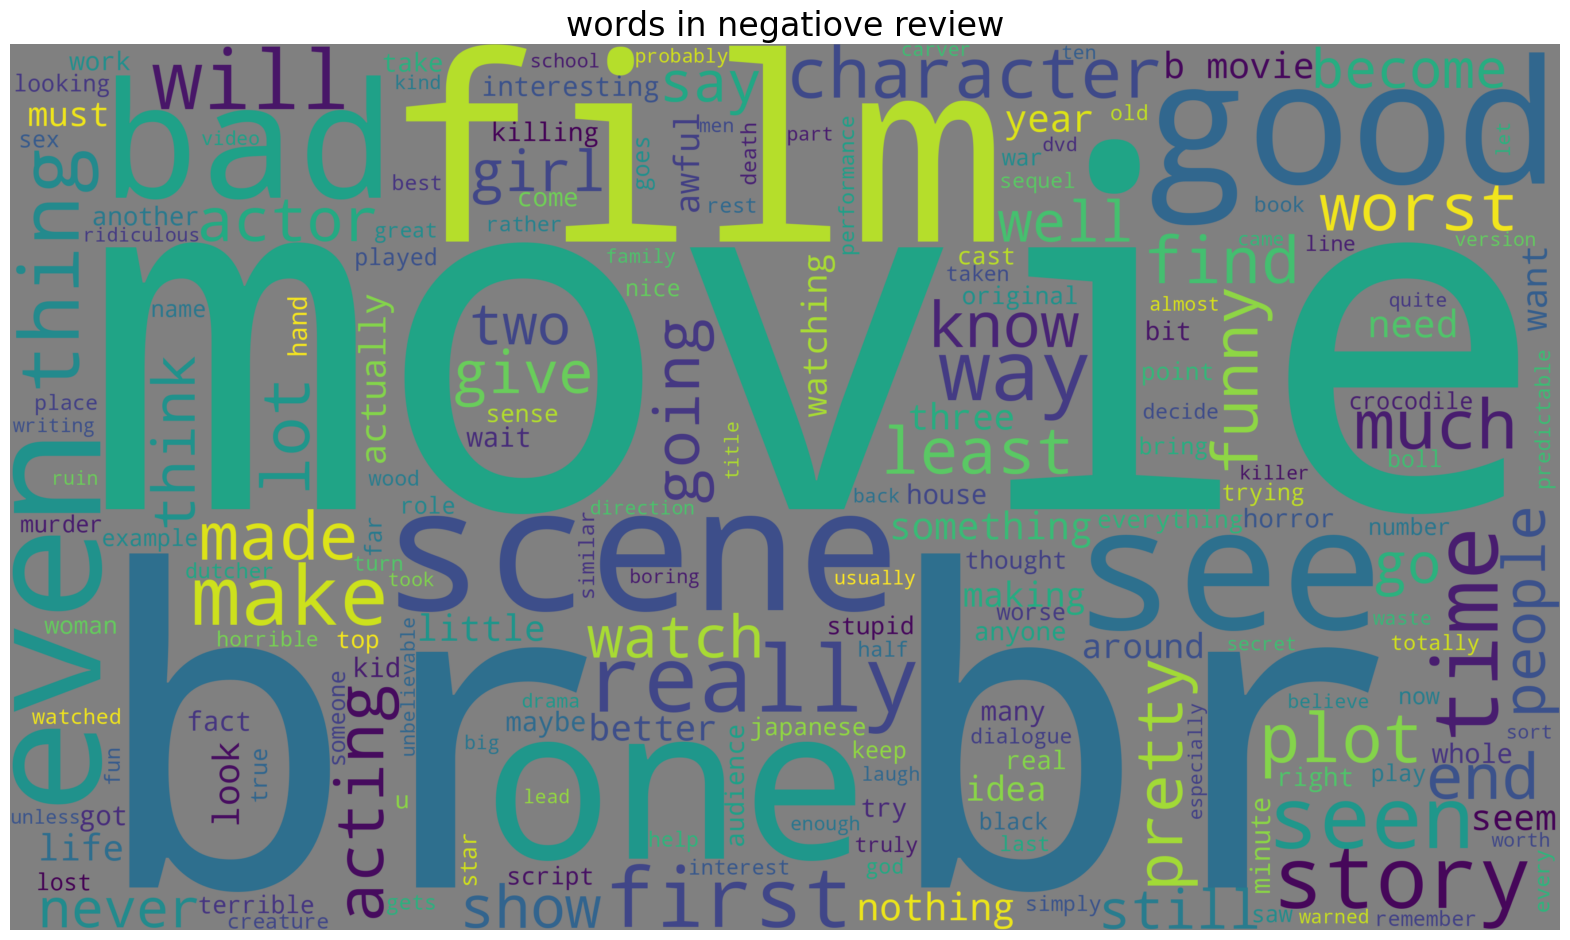

In [ ]:
create_cloud(' '.join(negative_reviews).lower(), 'words in negatiove review')

In [ ]:
def text_processing(data):
  from bs4 import BeautifulSoup # BeautifulSoup is remove the html tags
  import re # Full form of 're' is regex, it's faster process to finding pettern
  def decontracted(phrase):
    phrase = re.sub(r'<br /><br />', ' ', phrase)
    phrase = re.sub(r"won't", 'will not', phrase)
    phrase = re.sub(r"can\'t", 'can not', phrase)
    phrase = re.sub(r"n\'t", ' not', phrase)
    phrase = re.sub(r"\'re", ' are', phrase)
    phrase = re.sub(r"\'s", ' is', phrase)
    phrase = re.sub(r"\'d", ' would', phrase)
    phrase = re.sub(r"\'ll", ' will', phrase)
    phrase = re.sub(r"\'t", ' not', phrase)
    phrase = re.sub(r"\'ve", ' have', phrase)
    phrase = re.sub(r"\'m", ' am', phrase)
    phrase = re.sub(r'"', ' ', phrase)
    return phrase
  stopwords = set(STOPWORDS)

  from tqdm import tqdm  # tqdm is for printing the status/progress bar
  preprocessed_reviews = []
  for sentance in tqdm(data['review'].values):

    sentance = re.sub(r'http\S+', '', sentance)
    # ''http\S+'' it's a faster process to finding pettern

    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    # BeautifulSoup is remove the html tags

    sentance = decontracted(sentance)
    # decontracted function is used to reconstruction of sentances after finding pettern and removing the html tags

    sentance = re.sub('S*\d\S*', '', sentance).strip()
    # 'S*\d\S*' is replace all the extra spaces into empty string

    sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
    # Remove all the 'stopwords' and join the word to rebuild the complete sentance in lower case

    preprocessed_reviews.append(sentance.strip())
    # Aftr rebuild the complete sentance then remove the extra spaces if there is any

  from nltk.stem import PorterStemmer # Stemmer goes root form of the word
  porter = PorterStemmer()

  list2 = []
  for sentance in preprocessed_reviews:
    list1 = []
    for words in sentance.split():
      list1.append(porter.stem(words))
    list2.append(' '.join(list1))
  return list2


In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('ignore')

'ignor'

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer # Lemmatizer goes root form from between two different similar words
lemmatizer = WordNetLemmatizer()

In [ ]:
print('rocks: ', lemmatizer.lemmatize('rocks'))
print('corpora: ', lemmatizer.lemmatize('corpora'))
print('better: ', lemmatizer.lemmatize('better', pos='a'))

rocks:  rock
corpora:  corpus
better:  good


In [ ]:
x=text_processing(df)

100%|██████████| 100/100 [00:00<00:00, 1903.55it/s]


In [ ]:
x[0]

'one review mention watch oz episod will hooked. they right, exactli happen me.th first thing struck oz brutal unflinch scene violence, set right word go. trust me, show faint heart timid. thi show pull punch regard drugs, sex violence. it hardcore, classic use word.it call oz nicknam given oswald maximum secur state penitentary. it focus mainli emerald city, experiment section prison cell glass front face inwards, privaci high agenda. em citi home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgi deal shadi agreement never far away.i say main appeal show due fact goe show dare. forget pretti pictur paint mainstream audiences, forget charm, forget romance...oz mess around. the first episod i saw struck nasti surreal, i say i readi it, i watch more, i develop tast oz, got accustom high level graphic violence. not violence, injustic (crook guard will sold nickel, inmat will kill order away it, well mannered, middl class inmat t

In [ ]:
df['cleaned_review']=x

In [ ]:
df.sample(10)

,review,sentiment,cleaned_review
62,So let's begin!)))<br /><br />The movie itself...,positive,so let begin!)))th movi origin cronenberg movi...
70,Caddyshack Two is a good movie by itself but c...,negative,caddyshack two good movi compar origin cant st...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
54,The 33 percent of the nations nitwits that sti...,negative,the percent nation nitwit still support w. bus...
71,Honestly - this short film sucks. the dummy us...,negative,honestli - short film sucks. dummi use necro s...
92,"Deanna Durbin, Nan Grey and Barbara Read are ""...",positive,"deanna durbin, nan grey barbara read three sma..."
47,"How this film could be classified as Drama, I ...",negative,"how film classifi drama, i idea. if i john voi..."
12,So im not a big fan of Boll's work but then ag...,negative,so im big fan boll work mani are. i enjoy movi...
20,After the success of Die Hard and it's sequels...,positive,after success die hard sequel surpris realli g...
69,This film laboured along with some of the most...,negative,thi film labour along predict stori line shall...


# **Splitting Data**

In [ ]:
X = df['cleaned_review']
y = df['sentiment']

In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80,), (20,), (80,), (20,))

# **Data Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cvectorizer = CountVectorizer(max_features=200, ngram_range=(1,2))
X_train_bow = cvectorizer.fit_transform(X_train)
X_test_bow = cvectorizer.transform(X_test)

In [ ]:
X_train_bow.shape, X_test_bow.shape # Output of CountVectorizer

((80, 200), (20, 200))

In [ ]:
X_train_bow.toarray()[0].shape

(200,)

In [ ]:
list(X_train_bow.toarray()[0]) # Numerical representation of 0th row of index of 'cleaned_review'

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [ ]:
tvectorizer = TfidfVectorizer(max_features=200, ngram_range=(1,2))
# TfidfVectorizer: Rear words get priority and weight value will be heigh
X_train_bow_tv = tvectorizer.fit_transform(X_train)
X_test_bow_tv = tvectorizer.transform(X_test)

In [ ]:
X_train_bow_tv.shape, X_test_bow_tv.shape # Output of TfidfVectorizer

((80, 200), (20, 200))